In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('/content/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
print("Shape:", df.shape)

Shape: (150, 6)


In [8]:
print("Columns:", df.columns)

Columns: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [9]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


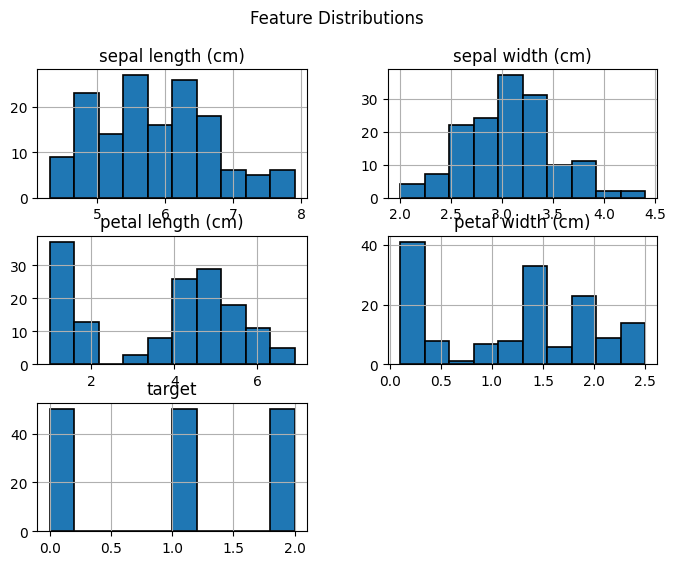

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
df = iris.frame

df.hist(edgecolor='black', linewidth=1.2, figsize=(8,6))
plt.suptitle("Feature Distributions")
plt.show()

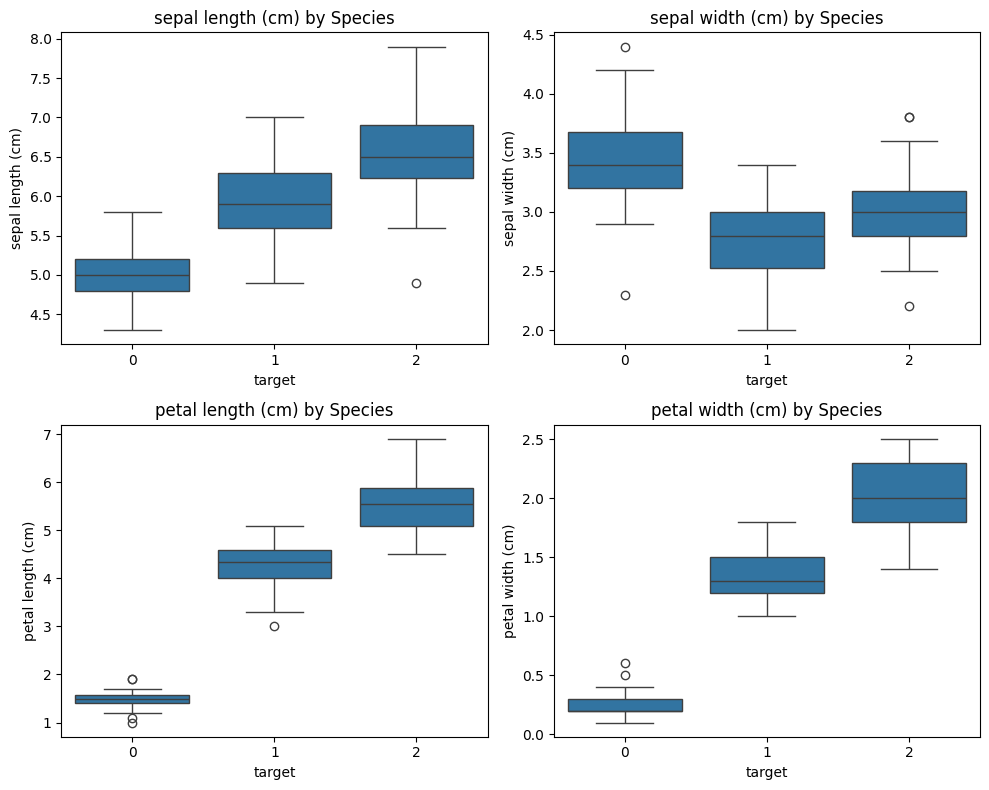

In [11]:
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(10,8))
features = df.columns[:-1]
for ax, feat in zip(axes.flatten(), features):
    sns.boxplot(x='target', y=feat, data=df, ax=ax)
    ax.set_title(f"{feat} by Species")
plt.tight_layout()
plt.show()

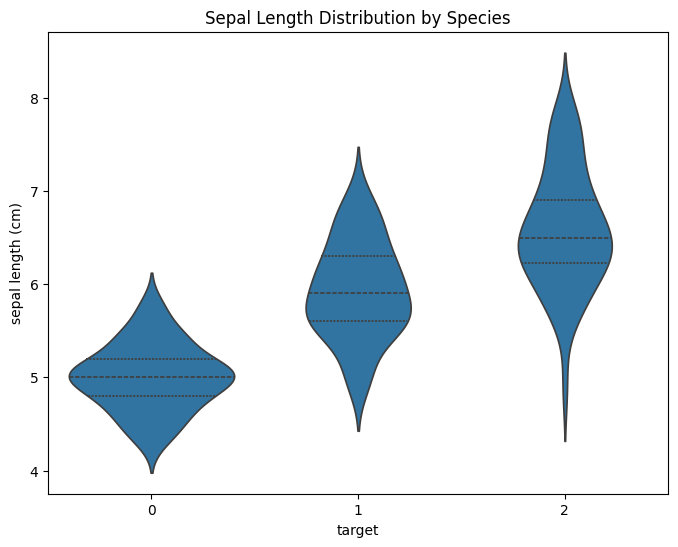

In [12]:
plt.figure(figsize=(8,6))
sns.violinplot(x='target', y='sepal length (cm)', data=df, inner='quartile')
plt.title("Sepal Length Distribution by Species")
plt.show()

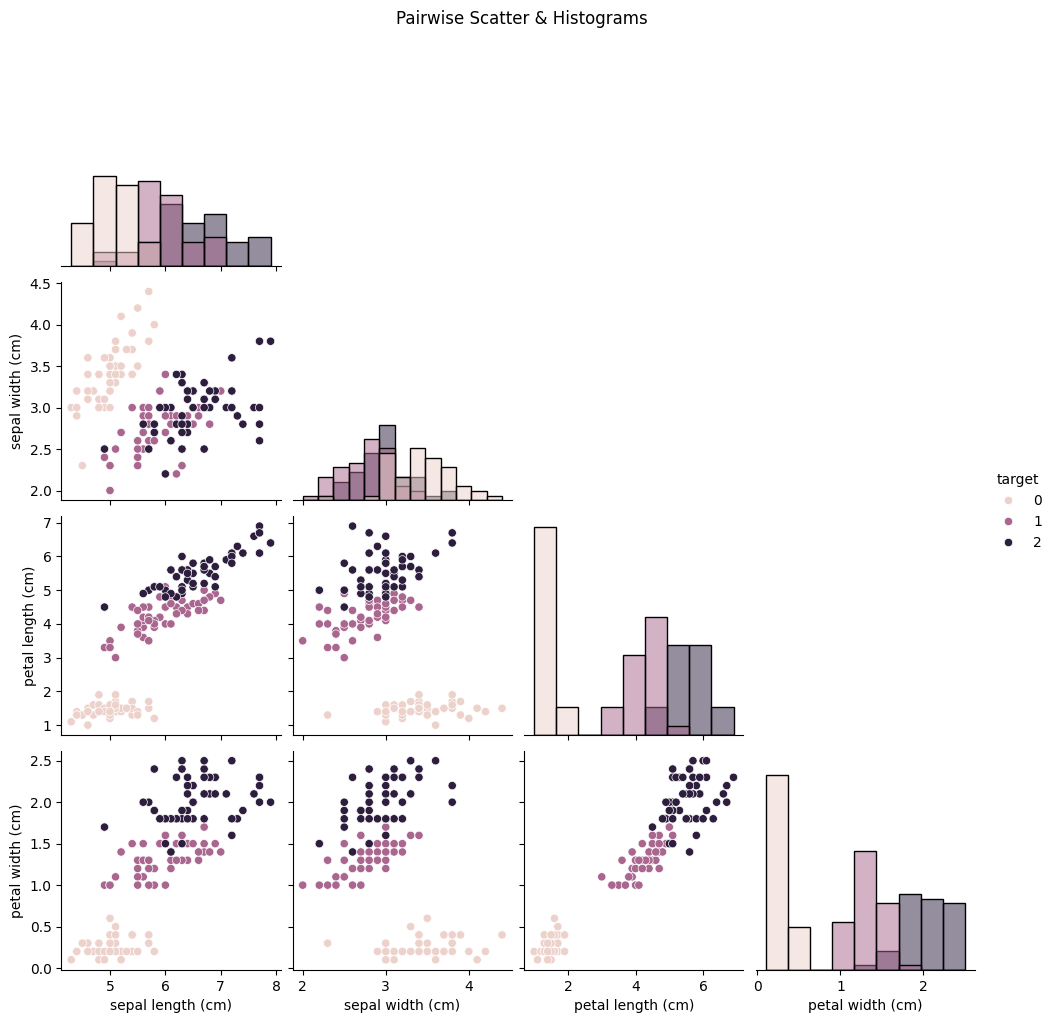

In [13]:
sns.pairplot(df, hue='target', corner=True, diag_kind='hist')
plt.suptitle("Pairwise Scatter & Histograms", y=1.02)
plt.show()

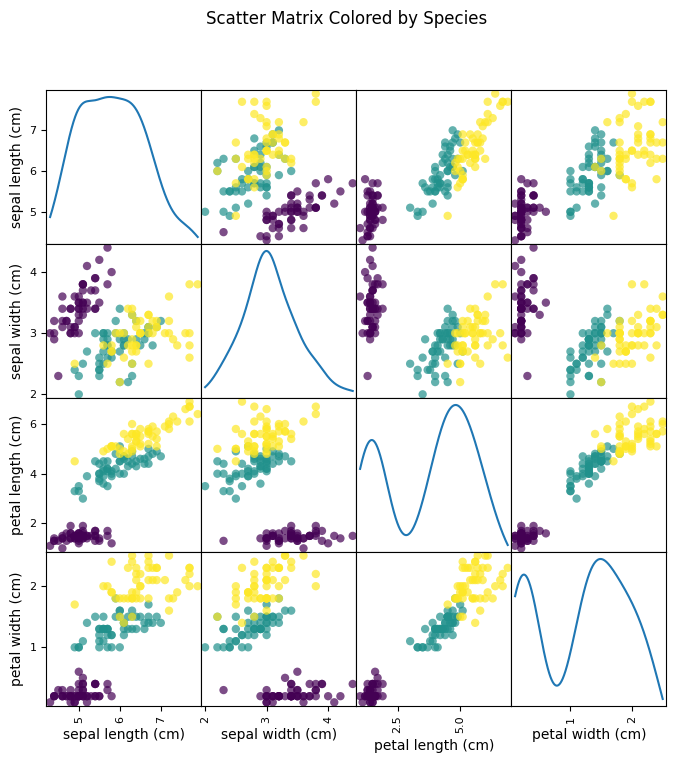

In [14]:
# Scatter matrix
pd.plotting.scatter_matrix(
    df.iloc[:, :-1], figsize=(8,8), diagonal='kde',
    marker='o', c=df['target'], cmap='viridis', alpha=0.7
)
plt.suptitle("Scatter Matrix Colored by Species")
plt.show()

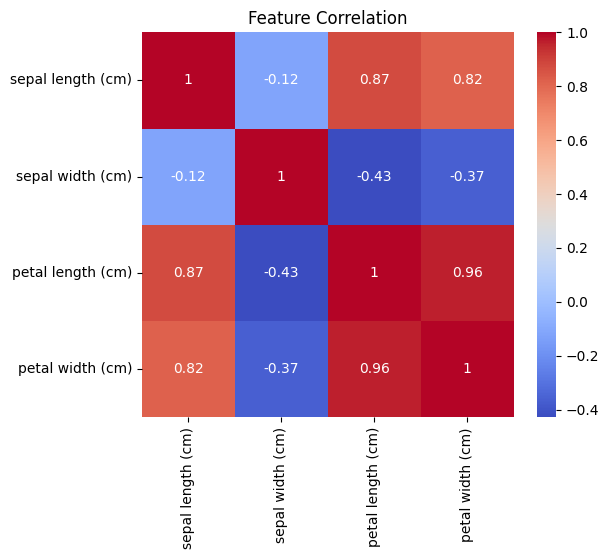

In [15]:
# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df.iloc[:,:-1].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

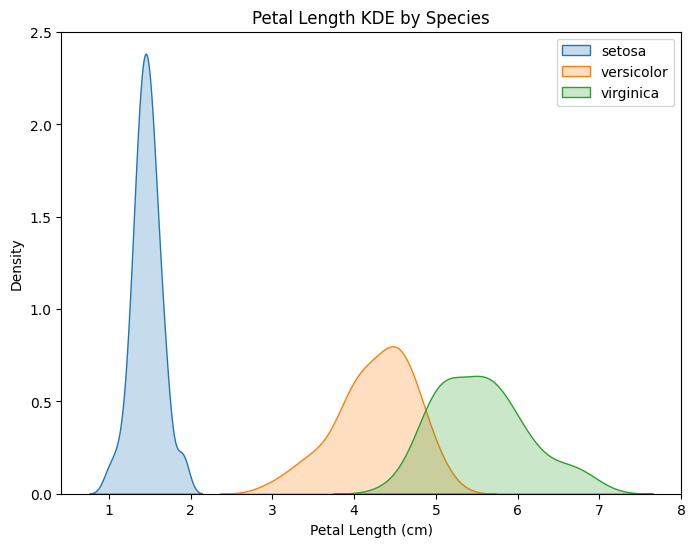

In [16]:
plt.figure(figsize=(8,6))
for species in df['target'].unique():
    subset = df[df['target']==species]
    sns.kdeplot(subset['petal length (cm)'], label=iris.target_names[species], fill=True)
plt.title("Petal Length KDE by Species")
plt.xlabel("Petal Length (cm)")
plt.legend()
plt.show()


In [17]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])
print(df[['target']].head())
print(df[['target']].tail())


   target
0       0
1       0
2       0
3       0
4       0
     target
145       2
146       2
147       2
148       2
149       2


In [25]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [29]:
# Use the dataframe loaded with sklearn.datasets.load_iris which has the 'target' column
X = df.drop(labels="target", axis=1)
y = df['target']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluation
print("🔷 Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

🔷 Decision Tree
Accuracy: 100.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [32]:
from sklearn.ensemble import RandomForestClassifier

# Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluation
print("🔷 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

🔷 Random Forest
Accuracy: 100.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [33]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Predict
y_pred_knn = knn.predict(X_test_scaled)

# Evaluation
print("🔷 K-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, y_pred_knn)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

🔷 K-Nearest Neighbors
Accuracy: 100.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [35]:
# prompt: create user predictive function

# Assuming the Random Forest model `rf` and the scaler `scaler` are already trained
# and `iris.target_names` is available as in the preceding code.

def predict_iris_species(sepal_length, sepal_width, petal_length, petal_width):
  """
  Predicts the Iris species based on the input measurements using the trained
  Random Forest model.

  Args:
    sepal_length: Sepal length in cm.
    sepal_width: Sepal width in cm.
    petal_length: Petal length in cm.
    petal_width: Petal width in cm.

  Returns:
    The predicted Iris species name (string).
  """
  # Create a numpy array from the input features
  features = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

  # Scale the features using the previously fitted scaler
  features_scaled = scaler.transform(features)

  # Make the prediction using the trained knn
  prediction_index = knn.predict(features_scaled)[0]

  # Map the predicted index back to the species name
  predicted_species = iris.target_names[prediction_index]

  return predicted_species

# Example usage:
# predicted_species = predict_iris_species(5.1, 3.5, 1.4, 0.2)
# print(f"Predicted species: {predicted_species}")

In [36]:
predicted_species = predict_iris_species(5.1, 3.5, 1.4, 0.2)
print(f"Predicted species: {predicted_species}")

Predicted species: setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
# prompt: create a gui with range and submit button

import ipywidgets as widgets
from IPython.display import display

# Define the input widgets for the features
sepal_length_widget = widgets.FloatSlider(min=0, max=10, step=0.1, description='Sepal Length:')
sepal_width_widget = widgets.FloatSlider(min=0, max=5, step=0.1, description='Sepal Width:')
petal_length_widget = widgets.FloatSlider(min=0, max=10, step=0.1, description='Petal Length:')
petal_width_widget = widgets.FloatSlider(min=0, max=5, step=0.1, description='Petal Width:')

# Define the output widget to display the prediction
output_widget = widgets.Output()

# Define the submit button
submit_button = widgets.Button(description="Predict Species")

# Define the function to call when the button is clicked
def on_submit_button_clicked(b):
    with output_widget:
        # Clear previous output
        output_widget.clear_output()

        # Get the values from the sliders
        sepal_length = sepal_length_widget.value
        sepal_width = sepal_width_widget.value
        petal_length = petal_length_widget.value
        petal_width = petal_width_widget.value

        # Make the prediction
        predicted_species = predict_iris_species(sepal_length, sepal_width, petal_length, petal_width)

        # Display the prediction
        print(f"Predicted species: {predicted_species}")

# Link the button click event to the function
submit_button.on_click(on_submit_button_clicked)

# Arrange the widgets in a VBox
gui = widgets.VBox([
    sepal_length_widget,
    sepal_width_widget,
    petal_length_widget,
    petal_width_widget,
    submit_button,
    output_widget
])

# Display the GUI
display(gui)
